# Classification Task dengan Decision Tree

**`Decision Tree`** atau induksi pohon keputusan adalah salah satu pendekatan pemodelan prediktif yang digunakan dalam statistik, penambangan data, dan pembelajaran mesin. Ini menggunakan Decision Tree (sebagai model prediktif) untuk berangkat dari pengamatan tentang suatu item (diwakili dalam cabang ) untuk kesimpulan tentang nilai target item (diwakili dalam daun). Model pohon di mana variabel target dapat mengambil satu set nilai diskrit disebut pohon klasifikasi; dalam struktur pohon ini, daun mewakili label kelas dan cabang mewakili konjungsi fitur yang mengarah ke label kelas tersebut. Decision Tree di mana variabel target dapat mengambil nilai kontinu (biasanya bilangan real) disebut pohon regresi. Decision Tree adalah salah satu algoritma pembelajaran mesin paling populer karena kejelasan dan kesederhanaannya.

Referensi: [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Konsep Dasar

Berikut adalah konsep dasar yang dapat memahami mekanisme kerja daripada `Decision Tree` yang menerapkan struktur pohon seperti pada contoh meme yang pernah beredar dibawah ini.

### Terminology: root node, internal node, leaf node

Berdasarkan dari gambar dibawah ini kita akan bertanya-tanya mengapa gambar tersebut dikatakan struktur pohon padahal gambar tersebut sangatlah jauh dari pohon. Struktur pohon pada gambar memang tampak tidak jelas karena gambar tersebut terlihat struktur pohon terbalik, berikut adalah beberapa komponen dari `Decision Tree`.

- `Root Node` sebagai akar pada posisi paling atas
- `Internal Node` sebagai posisi yang berada antara `Root` dan `Leaf` Node
- `Leaf Node` sebagai posisi paling bawah 

<div>
<img src="./images/decision_tree_example.png" width="600">
</div>

## Gini Impurity

Pada tahap ini kita akan membahas tentang `Impurity Measure` atau pengukuran ketidakmurnian. Pada kasus ini kita menggunakan **CART (Classification And Regression Tree)** yang merupakan default algorithms yang diterapkan oleh scikit learn sebagai implementasi dari Decision Tree, oleh karena itu kita perlu untuk mempelajari dari `Gini Impurity` yang memiliki nilai sebagai berikut :
- **0** sebagai nilai yang sempurna
- **1** sebagai nilai yang tidak murni/impurity

Berdasarkan dari gambar dibawah ini terdapat 10 data poin yang terbagi antara dua class yaitu class biru dan hijau dalam 2 buah ruas kiri dan kanan yang dipisahkan oleh garis putus-putus (splitter)

<div>
    <img src="./images/gini_example.png" width="400">
</div>


#### Ruas Kiri:

$
\begin{align*} 
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - P(biru)^2 \\
  &= 1 - (\frac{4}{4})^2 = 0
\end{align*}
$

#### Ruas Kanan:

$
\begin{align*}
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - (P(biru)^2 + P(hijau)^2)\\
  &= 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.278
\end{align*}
$


#### Average Gini Impurity:

$
\begin{align*}
G &= \frac{4}{4+6} \times 0 + \frac{6}{4+6} \times  0.278 \\
  &= 0.1668
\end{align*}
$

### Information Gain

Pada kasus ini kita dapat melihat beberapa perbedaan seperti pada `Gini Impurity` memiliki nilai **0.6779** sebelum dilakukan proses splitting, kemudian `Average Gini Impurity` memiliki nilai **0.1668** setelah dilakukan proses splitting. Selanjutnya setelah kita mengetahui dari kedua nilai tersebut kita dapat mengkalkulasikan nilai dari `Imformation Gain` yaitu dengan melakukan proses perselisihan antara nilai `Gini Impurity` dan `Average Gini Impurity` seperti gambar dibawah ini.

<div>
    <img src="./images/information_gain.png" width="500">
</div>

### Membangun Decision Tree

Pada tahap selanjutnya yaitu tahap `Membangun Decision Tree` yang menjelaskan sebagai berikut.

<div>
    <img src="./images/build_decision_tree.png" width="900">
</div>

$
\begin{align*} 
G &= 1 - (P(apple)^2 + P(grape)^2 + P(lemon)^2) \\
   &=1 - ( (\frac{2}{5})^2 + (\frac{2}{5})^2 + (\frac{1}{5})^2 ) \\
   &= 0.63
\end{align*}    
$

In [1]:
1 - ( (2/5)**2 + (2/5)**2 + (1/5)**2 )

0.6399999999999999

In [2]:
import pandas as pd

training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["Color", "Diameter", "Label"]

pd.DataFrame(training_data, columns=header)

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


## Dataset

**`Iris flower data set`** atau `Fisher's Iris data set` adalah kumpulan data multivariat yang diperkenalkan oleh ahli statistik, eugenicist, dan biologi Inggris Ronald Fisher dalam makalahnya tahun 1936 The use of multiple measurement in taxonomic problem sebagai contoh analisis diskriminan linier. Kadang-kadang disebut kumpulan data Iris Anderson karena Edgar Anderson mengumpulkan data untuk mengukur variasi morfologi bunga Iris dari tiga spesies terkait. Dua dari tiga spesies dikumpulkan di Semenanjung Gaspé "semuanya dari padang rumput yang sama, dan dipetik di tempat yang sama. hari dan diukur pada waktu yang sama oleh orang yang sama dengan alat yang sama”

Referensi: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Pada tahap selanjutnya pertama-tama kita lakukan import module `from sklearn.datasets import load_iris` dengan memanggil `load_iris(return_X_y=True)` yang ditampung ke dalam variabel `X` dan `y`. Kemudian melakukan Dimensi pada Feature dengan `X.shape` lalu pada class melakukan `{set(y)}` seperti script dibawah ini.

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


Untuk melakukan train_test_split terlebih dahulu melakukan import module `from sklearn.model_selection import train_test_split` kemudian menampung ke dalam 4 variabel yaitu `X_train`, `X_test`, `y_train`, `y_test ` lalu memanggil `train_test_split` yang memiliki 4 parameter yaitu :

- `X`
- `y`
- `test_size=0.3` sebagai 30% testing set
- `random_state=0`

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan `DecisionTreeClassifier`

Pada tahap ini untuk melakukan `Classification dengan DecisionTreeClassifier` terlebih dahulu melakukan import module `from sklearn.tree import DecisionTreeClassifier` kemudian memanggil `DecisionTreeClassifier(max_depth=4)` max_depth memiliki kedalam atau nilai 4 layer yang ditampung ke dalam variabel `model` lalu melakukan fit pada model yang memiliki parameter X_train dan y_train `model.fit(X_train, y_train)`.

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi Model

Untuk melakukan `Visualisasi Model` pertama-tama melakukan import module dengan `import matplotlib.pyplot as plt` dan `from sklearn import tree` selanjutnya kita akan mengatur `dpi figure` yang bernilai **85** `plt.rcParams['figure.dpi'] = 85`. Berikut kita akan siapkan figurenya dengan parameter **10, 10** `plt.subplots(figsize=(10, 10))`. Kemudian untuk melakukan Decision Tree kita dapat memanggil `tree.plot_tree(model, fontsize=10)` seperti script dibawah ini.

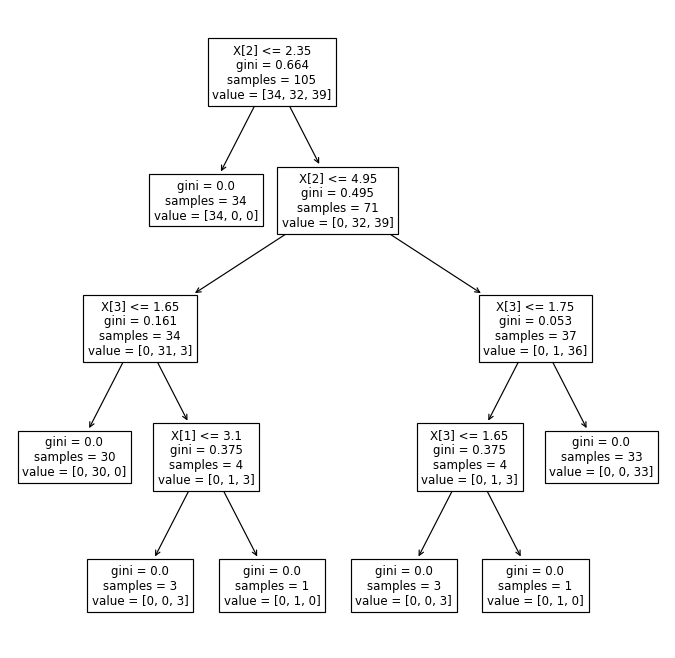

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

Pada kasus ini kita dapat melakukan `Evaluasi Model` yang memanfaatkan Classification Report dengan terlebih dahulu kita melakukan import module `from sklearn.metrics import classification_report` kemudian melakukan prediksi model dengan memanggil `model.predict(X_test)` yang ditampung ke dalam variabel `y_pred` selanjutnya kita dapat mencetak ke layar dengan `print(classification_report(y_test, y_pred))`.

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

